In [19]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from datetime import datetime
from pandas import DataFrame, Series
from scipy.stats import norm, shapiro
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.dates import DateFormatter

### Helper Functions 

In [7]:
def float_to_time(time_float):
    # Check if the input is within the valid range (0 < x < 24)
    if 0 <= time_float < 24:
        # Convert float to hours, minutes, and seconds
        hours = int(time_float)
        minutes = int((time_float - hours) * 60)
        seconds = int(((time_float - hours) * 60 - minutes) * 60)
        
        # Format the time as HH:MM:SS
        time_string = '{:02}:{:02}:{:02}'.format(hours, minutes, seconds)
        return time_string
    else:
        return "Invalid input. Time must be between 0 and 24."

## Beginning of Analysis

In [8]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
current_time = datetime.now()
current_time = current_time.hour + current_time.minute / 60 + current_time.second / 3600

df = pd.read_csv('BRTimeHistory_1699221717_Europe_London.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time
df['Day of Week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['Time int'] = df['Timestamp'].dt.hour + df['Timestamp'].dt.minute / 60 + df['Timestamp'].dt.second / 3600
# df.drop('Region', axis=1, inplace=True)
df.drop('Moment ID', axis=1, inplace=True)
# df.drop('Time.dt.hour + europe['Timestamp'].dt.minute / 60stamp', axis=1, inplace=True)

In [9]:
grouped = df.groupby('Region')
dataframes = [group for _, group in grouped]
east_asia, west_asia, europe, america = dataframes

In [10]:
europe

,Region,Timestamp,Date,Time,Day of Week,Hour,Minute,Second,Time int
2,europe-west,2023-11-06 18:36:58,2023-11-06,18:36:58,0,18,36,58,18.616111
7,europe-west,2023-11-05 09:57:35,2023-11-05,09:57:35,6,9,57,35,9.959722
11,europe-west,2023-11-04 12:50:08,2023-11-04,12:50:08,5,12,50,8,12.835556
14,europe-west,2023-11-03 12:08:43,2023-11-03,12:08:43,4,12,8,43,12.145278
18,europe-west,2023-11-02 12:34:41,2023-11-02,12:34:41,3,12,34,41,12.578056
...,...,...,...,...,...,...,...,...,...
342,europe-west,2023-08-13 10:27:18,2023-08-13,10:27:18,6,10,27,18,10.455000
346,europe-west,2023-08-12 22:03:53,2023-08-12,22:03:53,5,22,3,53,22.064722
350,europe-west,2023-08-11 10:44:06,2023-08-11,10:44:06,4,10,44,6,10.735000
354,europe-west,2023-08-10 16:36:31,2023-08-10,16:36:31,3,16,36,31,16.608611


In [11]:
mean_moment = europe['Time int'].mean()
print(mean_moment)
europe[['Hour', 'Minute', 'Second', 'Time int']].describe()

14.18758024691358


,Hour,Minute,Second,Time int
count,90.000000,90.000000,90.000000,90.000000
mean,13.711111,28.122222,27.955556,14.187580
std,3.666565,17.102354,18.012425,3.665385
min,5.000000,1.000000,1.000000,5.191111
25%,11.000000,13.000000,10.250000,11.248681
50%,14.000000,27.000000,26.000000,14.035000
75%,17.000000,42.750000,43.750000,17.306875
max,22.000000,59.000000,59.000000,22.702222


### Date vs Time Plot

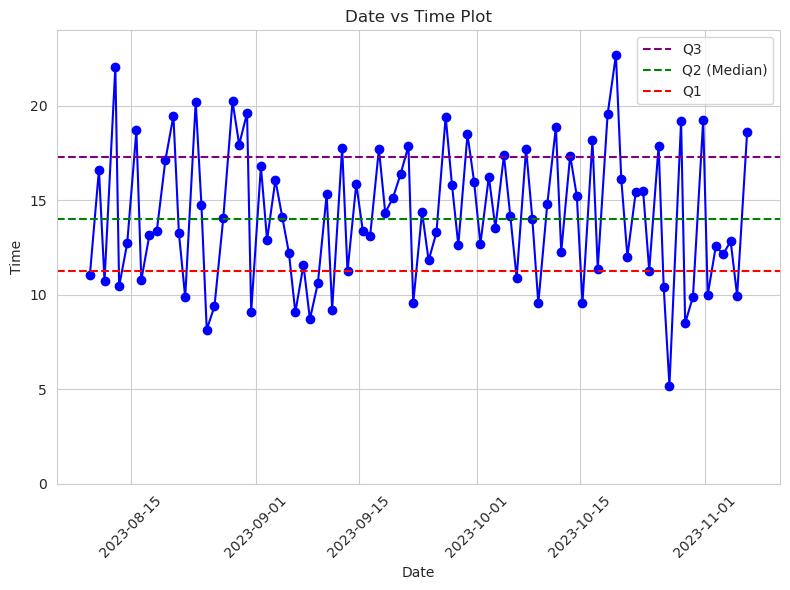

In [12]:
q1 = np.percentile(europe['Time int'], 25)
q2 = np.percentile(europe['Time int'], 50)  # Median (Q2) is the same as the 50th percentile
q3 = np.percentile(europe['Time int'], 75)
iqr = q3 - q1
whisker_end_low = q1 - 1.5 * iqr  # Lower whisker end
whisker_end_high = q3 + 1.5 * iqr  # Upper whisker end

plt.figure(figsize=(8, 6))
plt.plot(europe['Timestamp'], europe['Time int'], marker='o', linestyle='-', color='b')
# Plot quartiles as horizontal lines
# plt.axhline(y=whisker_end_high, color='brown', linestyle='--', label='Upper Whisker End')
plt.axhline(y=q3, color='purple', linestyle='--', label='Q3')
plt.axhline(y=q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axhline(y=q1, color='r', linestyle='--', label='Q1')
# plt.axhline(y=whisker_end_low, color='orange', linestyle='--', label='Lower Whisker End')

plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Date vs Time Plot')
plt.xticks(rotation=45)
plt.ylim(0, 24)
plt.legend()
plt.tight_layout()
plt.show()

### Time distribution 

/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


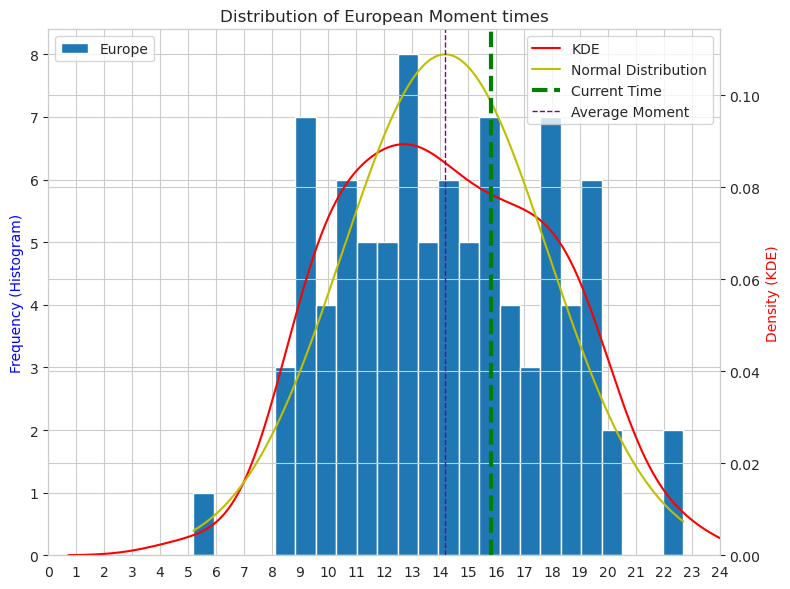

In [13]:
current_time = datetime.now()
current_time = current_time.hour + current_time.minute / 60 + current_time.second / 3600

mean, std = europe['Time int'].mean(), europe['Time int'].std()
xmin, xmax = europe['Time int'].min(), europe['Time int'].max()
x = np.linspace(xmin, xmax, 1000)
pdf = norm.pdf(x, mean, std)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.hist(europe['Time int'], bins=24, label='Europe')
plt.xlim(0, 24)
plt.xticks(range(25))
ax2 = ax1.twinx()
sns.kdeplot(europe['Time int'], ax=ax2, color='r', label='KDE')
ax2.plot(x, pdf, color='y', label='Normal Distribution')
ax1.set_ylabel('Frequency (Histogram)', color='blue')
ax2.set_ylabel('Density (KDE)', color='red')
plt.title('Distribution of European Moment times')
plt.axvline(current_time, color='green', linestyle='--', linewidth=3, label='Current Time')
plt.axvline(mean_moment, color='purple', linestyle='--', linewidth=1, label='Average Moment')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Get hourly probability

In [14]:
def getHourProbability(start: int, df: DataFrame=europe ) -> float: 
    end = start + 1  # 1 hour window
    count = df['Time int'].count()
    series = df['Time int']
    occurrences_in_window = series[(series >= start) & (series < end)].count()
    p = occurrences_in_window / count
    return p

getHourProbability(12)

0.1111111111111111

### Remaining hours probability

/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15.825555555555555


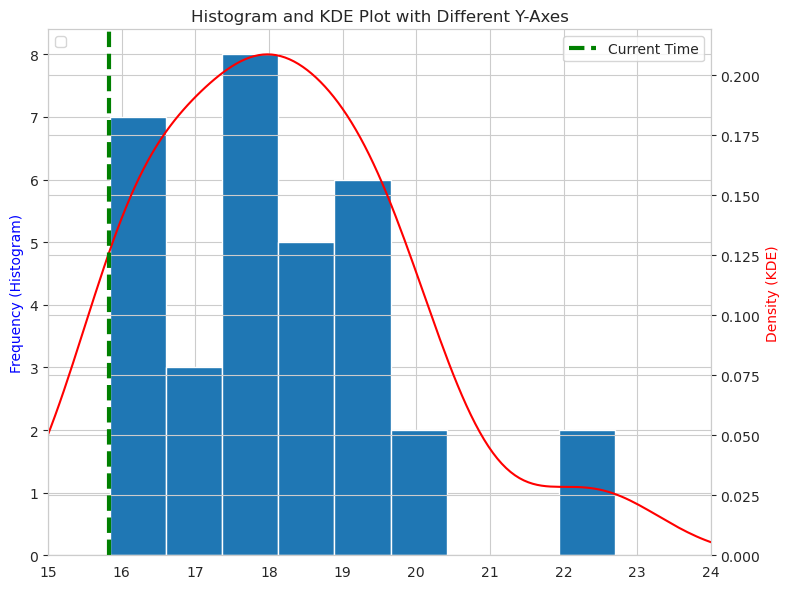

In [15]:

number_of_bins = 24 - math.floor(current_time)
print(current_time)
series = europe['Time int']
filtered_series = series[series >= current_time]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.hist(filtered_series, bins=number_of_bins)
plt.xlim(int(current_time), 24)
ax2 = ax1.twinx()
sns.kdeplot(filtered_series, ax=ax2, color='r')
ax1.set_ylabel('Frequency (Histogram)', color='blue')
ax2.set_ylabel('Density (KDE)', color='red')
plt.title('Histogram and KDE Plot with Different Y-Axes')
plt.axvline(current_time, color='green', linestyle='--', linewidth=3, label='Current Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show() 

### Day of the Week analysis

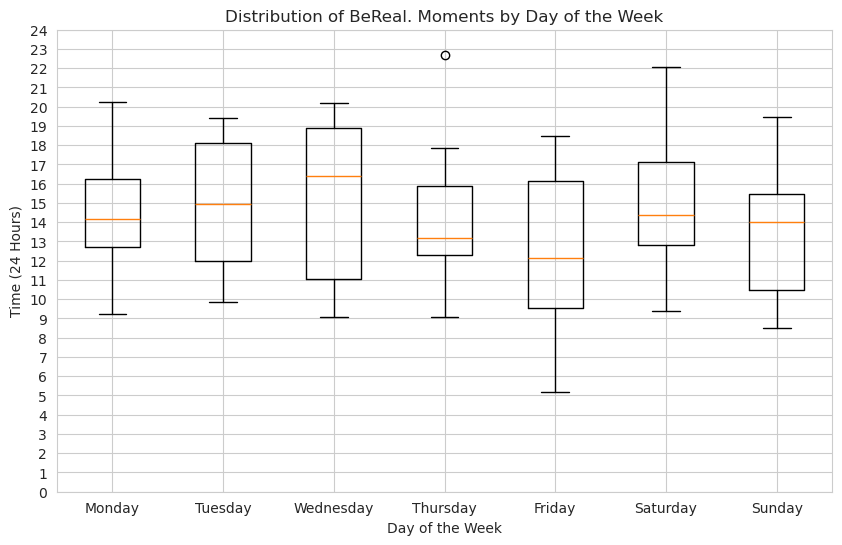

In [16]:
grouped_data = europe.groupby('Day of Week')

data_to_plot = []

# Iterate through each group and extract the data for boxplot
for day, group in grouped_data:
    data_to_plot.append(group['Time int'])
    

# Create boxplots for each day of the week
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=day_names)
plt.yticks(range(25))
plt.xlabel('Day of the Week')
plt.ylabel('Time (24 Hours)')
plt.ylim(0, 24)
plt.title('Distribution of BeReal. Moments by Day of the Week')
plt.show()

### Minute and Second analysis

/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tctb/.conda/envs/cal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

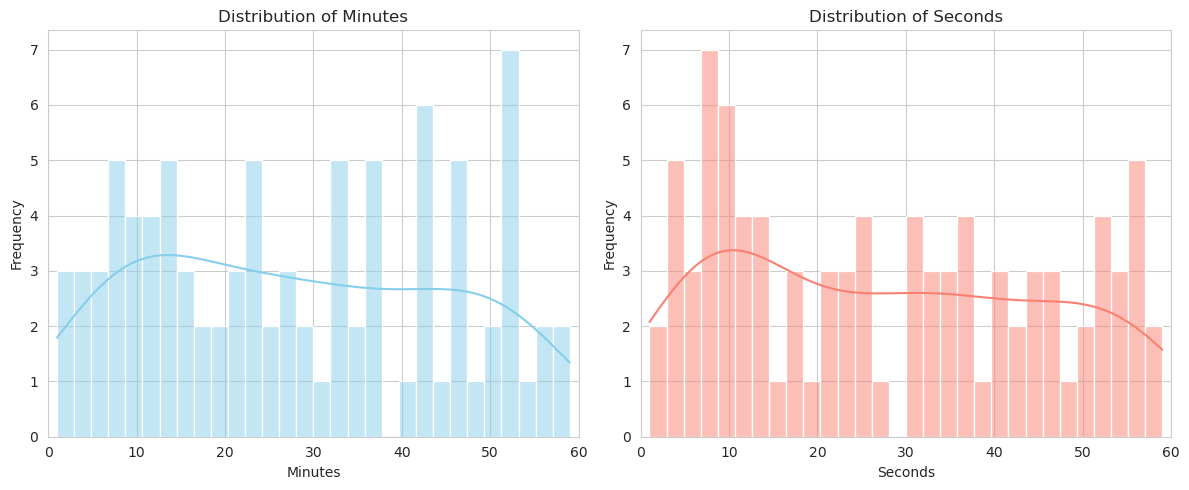

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
number_of_bins = 30

# Plot histogram for 'minutes' column
sns.histplot(europe['Minute'], ax=axs[0], color='skyblue', kde=True, bins=number_of_bins)
axs[0].set_title('Distribution of Minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0, 60)

# Plot histogram for 'seconds' column
sns.histplot(europe['Second'], ax=axs[1], color='salmon', kde=True, bins=number_of_bins)
axs[1].set_title('Distribution of Seconds')
axs[1].set_xlabel('Seconds')
axs[1].set_ylabel('Frequency')
axs[1].set_xlim(0, 60)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Shapiro-Wilk Test

In [25]:
data = europe['Hour'].sort_values(ascending=True)
mean, std = europe['Hour'].mean(), europe['Time int'].std()
pdf = norm.pdf(data, mean, std)

stat, p_value = shapiro(pdf)
alpha = 0.05

print(f'Shapiro-Wilk test statistic: {stat:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")
    
data

Shapiro-Wilk test statistic: 0.916
P-value: 0.000
The data does not appear to be normally distributed (reject H0)


44      5
296     8
240     8
34      8
271     9
       ..
26     19
301    20
281    20
346    22
74     22
Name: Hour, Length: 90, dtype: int32